In [1]:
# Install all the required library
# !git clone https://github.com/theochem/chemtools.git chemtools
# !conda install -c theochem horton
# !conda install git-lfs



# import ChemTools library
import chemtools

# print version of ChemTools library
print(chemtools.__version__)

0.9.0


In [2]:
!chemtools --help

usage: chemtools [-h] [-v] <Commands> ...

ChemTools command-line tools

positional arguments:
  <Commands>     <Functions>
    mot          Molecular Orbital Theory (MOT).
    esp          Electrostatic Potential (ESP).
    nci          Non-Covalent Interactions (NCI).
    elf          Electron Localization Function (ELF).
    lol          Localized Orbital Locator (LOL).
    gcdft        Global Conceptual Density Functional Theory.
    lcdft        Local Conceptual DFT.
    ccdft        Condensed Conceptual DFT.

optional arguments:
  -h, --help     show this help message and exit
  -v, --version  show program's version number and exit


In [3]:
!pwd
!ls 

/scratch/sandip/current-project/chemtools/chemtool-test


al3ga3-dens.cube  al3ga3.vmd		   data
al3ga3-grad.cube  chemtool-analysis.ipynb  venky


INFO: Initialize   : <class 'chemtools.toolbox.conceptual.GlobalConceptualDFT'>
INFO: Energy Model : linear
INFO: Initialize   : <class 'chemtools.toolbox.conceptual.GlobalConceptualDFT'>
INFO: Energy Model : quadratic
INFO: Initialize   : <class 'chemtools.toolbox.conceptual.GlobalConceptualDFT'>
INFO: Energy Model : rational




User:           sandip
Machine info:   Linux ichamati.iitkgp.ac.in 3.10.0-693.5.2.el7.x86_64 #1 SMP Fri Oct 20 20:32:50
                UTC 2017 x86_64
Time:           2023-07-18T10:16:56.317508
Python version: 3.9.12 (main, Apr  5 2022, 06:56:58) [GCC 7.5.0]
HORTON version: 2.1.0
Current Dir:    /scratch/sandip/current-project/chemtools/chemtool-test
Command line:   /home/sandip/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py
                --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000
                --Session.signature_scheme="hmac-sha256"
                --Session.key=b"99bc9bab-4466-417a-9d7d-1e907181ce47" --shell=9002
                --transport="tcp" --iopub=9004
                --f=/home/sandip/.local/share/jupyter/runtime/kernel-v2-179175rq4gbOjrPHKo.json
HORTON module:  /home/sandip/miniconda3/lib/python3.9/site-packages/horton/log.py

Initialized: <horton.gbasis.cext.GOBasis object at 0x7fd475ce2940>
  Number of basis functions         : 270
  Number o

INFO: Initialize   : <class 'chemtools.toolbox.conceptual.GlobalConceptualDFT'>
INFO: Energy Model : exponential


Initialized: <horton.gbasis.cext.GOBasis object at 0x7fd475cb0280>
  Number of basis functions         : 270
  Number of normalization constants : 540
  Maximum shell type                : 3
  Center     0 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     1 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     2 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     3 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1
  Center     4 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1
  Center     5 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1



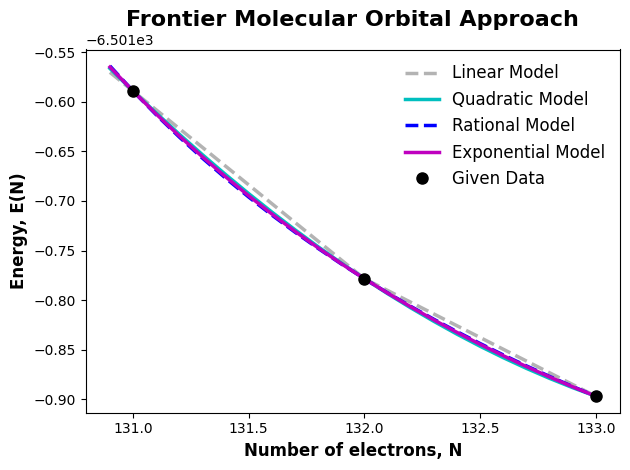

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from chemtools import GlobalConceptualDFT
%matplotlib inline

# 1. Build linear and quadratic energy models using FMO approach

# path to molecule's fchk file
file_path = 'data/al3ga3.fchk'
# build linear & quadratic global conceptual DFT tool (one file is passed, so FMO approach is taken)
model_lin = GlobalConceptualDFT.from_file(file_path, 'linear')
model_qua = GlobalConceptualDFT.from_file(file_path, 'quadratic')
model_rat = GlobalConceptualDFT.from_file(file_path, 'rational')
model_exp = GlobalConceptualDFT.from_file(file_path, 'exponential')

# 2. Compute energy values for various number of electrons.

# get reference number of electrons, n0, from either linear or quadratic models
n0 = model_lin.n0
# sample number of electrons around n0
n_values = np.arange(n0 - 1.1, n0 + 1.1, 0.1)
# compute linear & quadratic energy values for sampled number of electrons
energy_lin = [model_lin.energy(n) for n in n_values]
energy_qua = [model_qua.energy(n) for n in n_values]
energy_rat = [model_rat.energy(n) for n in n_values]
energy_exp = [model_exp.energy(n) for n in n_values]

# 3. Plot energy vs. number of electrons.

# plot linear energy model
plt.plot(n_values, energy_lin, color='0.7', linestyle='--', linewidth=2.5,
         label='%s Model' % model_lin.model.capitalize())
# plot quadratic energy model
plt.plot(n_values, energy_qua, color='c', linestyle='-', linewidth=2.5,
         label='%s Model' % model_qua.model.capitalize())
# plot rational energy model
plt.plot(n_values, energy_rat, color='b', linestyle='--', linewidth=2.5,
         label='%s Model' % model_rat.model.capitalize())
# plot exponential energy model
plt.plot(n_values, energy_exp, color='m', linestyle='-', linewidth=2.5,
         label='%s Model' % model_exp.model.capitalize())

# 4. Plot data points used for modeling energy.

# number of electrons used for modeling energy
n_data = [n0 - 1, n0, n0 + 1]
# compute energy values used for modeling energy
# Note: any of the tools built above can be used for this purpose because
#       they all have the same energy for N0 - 1, N0, and N0 + 1 electrons.
e_data = [model_lin.energy(n) for n in n_data]

# plot given data points
plt.plot(n_data, e_data, marker='o', markersize=8, color='k', linestyle='', label='Given Data')

# add axis label
plt.xlabel('Number of electrons, N', fontsize=12, fontweight='bold')
plt.ylabel('Energy, E(N)', fontsize=12, fontweight='bold')
# add title
plt.title('Frontier Molecular Orbital Approach', fontsize=16, fontweight='bold')
# add legend & remove legend frame
plt.legend(frameon=False, fontsize=12)
# show plot
plt.tight_layout()
plt.show()

In [5]:
from chemtools import  UniformGrid, Molecule, print_vmd_script_isosurface, DFTBasedTool

# 1. Build Orbital Theory model

fname = 'data/al3ga3'

mol = Molecule.from_file(fname + '.fchk')
cub = UniformGrid.from_molecule(mol, spacing=1.0, extension=5.0)
orb = DFTBasedTool.from_molecule(mol, cub.points)

# 2. Generate cube files: fname_esp.cube & fname_rho.cube

lip_a, lip_b = orb.average_local_ionization_energy

lipname = fname + '_lip.cube'
rhoname = fname + '_rho.cube'

cub.generate_cube(rhoname, mol.compute_density(cub.points))
cub.generate_cube(lipname, lip_a + lip_b)

# 3. Generate vmd script: fname.vmd
#    To visualize the iso-surface, use command: $ vmd -e fname.vmd

print_vmd_script_isosurface(fname + '.vmd', rhoname, colorfile=lipname, isosurf=0.002,
                            scalemin=-1.0, scalemax=mol.mo.homo_energy[0])

INFO: Initialized cube: <class 'chemtools.utils.cube.UniformGrid'>
INFO: Origin : [-7.99999997 -8.5        -7.50000003]
INFO: Axes 1 : [1.00000000e+00 1.82331528e-09 2.29825286e-09]
INFO: Axes 2 : [-1.82331528e-09  1.00000000e+00  1.71810062e-09]
INFO: Axes 3 : [-2.29825286e-09 -1.71810076e-09  1.00000000e+00]
INFO: Shape  : [16 17 15]


Initialized: <horton.gbasis.cext.GOBasis object at 0x7fd4758ceca0>
  Number of basis functions         : 270
  Number of normalization constants : 540
  Maximum shell type                : 3
  Center     0 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     1 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     2 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     3 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1
  Center     4 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1
  Center     5 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1



In [6]:
!ls

al3ga3-dens.cube  al3ga3.vmd		   data
al3ga3-grad.cube  chemtool-analysis.ipynb  venky


In [7]:
!ls data/

al3ga3.fchk  al3ga3_lip.cube  al3ga3_rho.cube  al3ga3.vmd  b2-job.wfn


In [8]:
from chemtools import NCI


# 1. Build NCI model

nci = NCI.from_file('data/al3ga3.fchk')

# 2. Generate plot, cube file(s) and script for visualizing NCI

nci.generate_scripts('al3ga3')

INFO: Initialized cube: <class 'chemtools.utils.cube.UniformGrid'>
INFO: Origin : [-4.99999998 -5.45       -4.10000002]
INFO: Axes 1 : [1.00000000e-01 1.82331528e-10 2.29825286e-10]
INFO: Axes 2 : [-1.82331528e-10  1.00000000e-01  1.71810062e-10]
INFO: Axes 3 : [-2.29825286e-10 -1.71810076e-10  1.00000000e-01]
INFO: Shape  : [100 109  82]


Initialized: <horton.gbasis.cext.GOBasis object at 0x7fd4758de220>
  Number of basis functions         : 270
  Number of normalization constants : 540
  Maximum shell type                : 3
  Center     0 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     1 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     2 :  S7 S3 S2 S1 S1 P5 P1 P1 P1 P1 Dp1 Dp1 Dp1 Fp1
  Center     3 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1
  Center     4 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1
  Center     5 :  S8 S4 S2 S1 S1 S1 P6 P3 P1 P1 P1 Dp5 Dp1 Dp1 Dp1 Fp1



In [15]:
!ls -ltr

total 23088
drwxr-xr-x 9 sandip software     4096 Mar 14 10:59 chemtools
drwxr-xr-x 2 sandip software      107 Mar 15 14:13 data
-rw-r--r-- 1 sandip software 11768943 Mar 16 12:30 al3ga3-dens.cube
-rw-r--r-- 1 sandip software     1088 Mar 16 12:30 al3ga3.vmd
-rw-r--r-- 1 sandip software 11768943 Mar 16 12:30 al3ga3-grad.cube
-rw-r--r-- 1 sandip software    87108 Mar 16 12:31 chemtool-analysis.ipynb
